<a href="https://www.kaggle.com/code/yehorkorzh/fake-news-detection-96-accuracy?scriptVersionId=120625011" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
!nvidia-smi

Tue Oct  4 11:06:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
df_fake_news = pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')
df_true_news = pd.read_csv('../input/fake-and-real-news-dataset/True.csv')

In [4]:
df_fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_fake_news['fake'] = 1
df_true_news['fake'] = 0

In [7]:
df_true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   fake     21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [8]:
# Concatenate fake and true news
df_news = pd.concat([df_fake_news, df_true_news])

In [9]:
df_news.sample(5)

,title,text,subject,date,fake
9944,"Unions endorse Sanders, Clinton for president ...",WASHINGTON (Reuters) - Democratic presidential...,politicsNews,"April 13, 2016",0
13397,FIVE FACTS About Benghazi That Hillary Doesn’t...,FIVE FACTS ABOUT HILLARY AND BENGHAZI:,politics,"Jul 29, 2016",1
6843,4 Insanely Great Ways One Idea From Obama Jus...,The New York Times has done a major new study ...,News,"April 18, 2016",1
6962,Biden Says He’s ‘Ready’ For A Woman President...,Vice President Joe Biden has been careful to g...,News,"April 11, 2016",1
12212,"Poland gives government key election role, opp...",WARSAW (Reuters) - Poland s parliament has pas...,worldnews,"December 15, 2017",0


In [10]:
# Check for any null values
df_news.isnull().sum()

title      0
text       0
subject    0
date       0
fake       0
dtype: int64

In [11]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   fake     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


# Data analysis, data visualization and creating new features

<AxesSubplot:xlabel='fake', ylabel='count'>

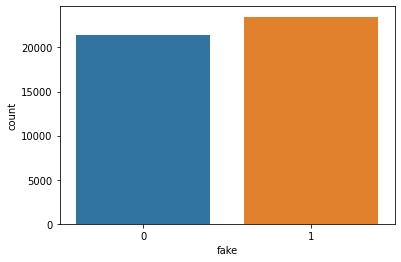

In [12]:
# Explore the target variable
sns.countplot(x='fake', data=df_news)

<AxesSubplot:xlabel='subject', ylabel='count'>

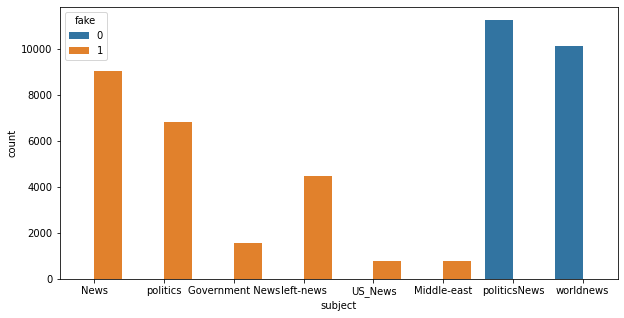

In [13]:
# Explore the subject column
plt.figure(figsize=(10,5))
sns.countplot(x='subject', data=df_news, hue='fake')

In [14]:
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce') # If 'coerce', then invalid parsing will be set as NaT.
df_news['Year'] = df_news['date'].dt.year
df_news['Month'] = df_news['date'].dt.month

df_news.head()

,title,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017.0,12.0


<AxesSubplot:xlabel='Year', ylabel='count'>

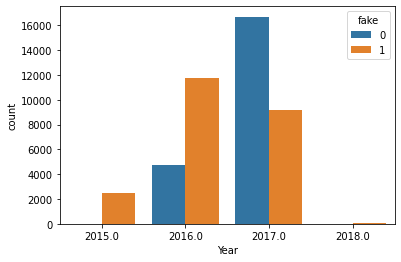

In [15]:
# check the impact of year on the target
sns.countplot(x='Year', data=df_news, hue='fake')

<AxesSubplot:xlabel='Month', ylabel='count'>

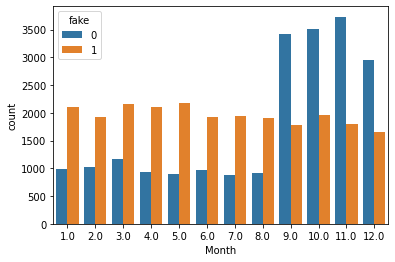

In [16]:
# check the impact of month on the target
sns.countplot(x='Month', data=df_news, hue='fake')

In [17]:
# combining the title and text column and drop title column
df_news['text'] = df_news['title'] + df_news['text']
df_news.drop(labels=['title'], axis=1, inplace=True)

In [18]:
df_news.sample(5)

,text,subject,date,fake,Year,Month
6797,Trump to name Goldman executive Cohn to key ec...,politicsNews,2016-12-09,0,2016.0,12.0
15633,"Sacked Catalonia leader turns himself in, poll...",worldnews,2017-11-05,0,2017.0,11.0
13179,BREAKING: KEY PERSON In Clinton Scandal Emerge...,politics,2016-08-24,1,2016.0,8.0
13924,Rights groups say outside monitors needed for ...,worldnews,2017-11-24,0,2017.0,11.0
16540,BOOM! Rep Louie Gohmert (R-TX) Rips Into Obama...,Government News,2016-06-23,1,2016.0,6.0


In [19]:
# We will remove all attributes and go ahead with "text" attribute only
df_news.drop(labels=['subject','date', 'Year','Month'], axis=1, inplace=True)
df_news.head()

,text,fake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


# Splitting the dataset into training and test dataset

In [20]:
# Dataframe shuffling and feature and label extraction
df_news = df_news.sample(frac=1) # frac=1 means to return all rows (in random order)
df_news.head()

,text,fake
6328,Non-Transgender Woman Harassed In Bathroom Af...,1
6636,California Trump Rally Leads To Violence Betw...,1
3732,Spice Company Owner Causes Family Feud When H...,1
8623,U.S. expands Central American refugee screenin...,0
23169,"‘Beyonce, Jay Z, Hillary Clinton – You Don’t R...",1


In [21]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels=train_test_split(
    df_news['text'].to_numpy(),
    df_news['fake'].to_numpy(),
    test_size=0.2,
    random_state=42)


In [22]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(35918, 8980, 35918, 8980)

# Vectorization (Tokenization)

In [23]:
# Tokenization is the process of splitting a stream of language into individual tokens. 
# Vectorization is the process of converting string data into a numerical representation
# tokenization - youtube.com/watch?v=fNxaJsNG3-s
# finding average number of tokens (words) in the training tweets

round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

416

In [25]:
max_vocab_length = 10000
max_length = 418

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [27]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [28]:
sample_sentence_vectorizer = "Just checking the text vectorizer"
text_vectorizer([sample_sentence_vectorizer])

<tf.Tensor: shape=(1, 418), dtype=int64, numpy=
array([[  77, 8319,    2, 2857,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [29]:
# checking

import random

random_sentence = random.choice(train_sentences)

print(f"Original text;\n{random_sentence}\\n\n\nVectorized Version:{text_vectorizer([random_sentence])}")

Original text;
SHERIFF CLARKE BLASTS Liberal Crybaby Lawyer: “There Are Dead Cops Because Of Fake News Story [‘Hands Up Don’t Shoot’] Out Of Ferguson, Missouri” [VIDEO]"Fake news" was born in August 2014 in Ferguson MO. when @MSNBC @nytimes @washingtonpost @CNN all propagated the Hands up, Don't shoot lie. pic.twitter.com/O2cjpm63GQ  David A. Clarke, Jr. (@SheriffClarke) December 6, 2016On Thursday Sheriff Clarke went off on liberal lawyer Eric Guster on Hannity over the  Hands up, Don t Shoot  lie. Clarke slammed the lawyer for pushing lies that have resulted in the deaths of police officers across the country.After Guster defended the  Hands Up, Don t Shoot  movement Sheriff Clarke went off.  GP\n

Vectorized Version:[[1915 5899 5458  643    1  846 2692   29 1083 2022   92    4  610   95
   298    1   64 1032    1   55    4 3083    1    1   95   18 1554    7
   618  597    7 3083 7918   61 1633 8294    1  392   56    1    2 1005
    64 4772 2900 1442    1  902    5 5899 1288    1  60

# Creating an Embedding using an Embedding Layer (keras)

In [30]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length)

In [31]:
# Get a random sentence from the training set
new_random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nEmbedd version: {embedding(text_vectorizer([random_sentence]))}")

Original text:
SHERIFF CLARKE BLASTS Liberal Crybaby Lawyer: “There Are Dead Cops Because Of Fake News Story [‘Hands Up Don’t Shoot’] Out Of Ferguson, Missouri” [VIDEO]"Fake news" was born in August 2014 in Ferguson MO. when @MSNBC @nytimes @washingtonpost @CNN all propagated the Hands up, Don't shoot lie. pic.twitter.com/O2cjpm63GQ  David A. Clarke, Jr. (@SheriffClarke) December 6, 2016On Thursday Sheriff Clarke went off on liberal lawyer Eric Guster on Hannity over the  Hands up, Don t Shoot  lie. Clarke slammed the lawyer for pushing lies that have resulted in the deaths of police officers across the country.After Guster defended the  Hands Up, Don t Shoot  movement Sheriff Clarke went off.  GP

Embedd version: [[[ 0.01199331  0.02679683  0.03432889 ...  0.02889754  0.01066575
   -0.02401384]
  [-0.03825109  0.02279098 -0.03256658 ... -0.01867114  0.00425774
    0.0225675 ]
  [ 0.0421182  -0.00205553 -0.03806686 ... -0.03571843  0.00479344
    0.03901651]
  ...
  [-0.00948982  0.000

# Modelling

In [32]:
# Moddeling with LSTM(long-short term memory) neural network.
# LSTM is - https://www.youtube.com/watch?v=JE9YcTozgC4

# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')

# Pass inputs to text_vectorizer(convert text into numbers)
x = text_vectorizer(inputs) 

# Convert text_vectorizer layer into embedding layer
x = embedding(x)

# Model 
x = layers.LSTM(64)(x)

# output
outputs = layers.Dense(1, activation='sigmoid')(x)

# Pass inputs and outputs to our model
model = tf.keras.Model(inputs, outputs, name='model_LSTM')

In [33]:
model.summary()

Model: "model_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 418)               0         
_________________________________________________________________
embedding (Embedding)        (None, 418, 128)          1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [35]:
# Fit the model
model_history = model.fit(train_sentences,
                          train_labels,
                          epochs=5,
                          validation_data=(val_sentences, val_labels))

Epoch 1/5


2022-10-04 11:07:46.769899: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1123/1123 [==============================] - 30s 25ms/step - loss: 0.3797 - accuracy: 0.8409 - val_loss: 0.1963 - val_accuracy: 0.9470
Epoch 2/5
1123/1123 [==============================] - 27s 24ms/step - loss: 0.2332 - accuracy: 0.9305 - val_loss: 0.2277 - val_accuracy: 0.9258
Epoch 3/5
1123/1123 [==============================] - 27s 24ms/step - loss: 0.2943 - accuracy: 0.8906 - val_loss: 0.4343 - val_accuracy: 0.7882
Epoch 4/5
1123/1123 [==============================] - 27s 24ms/step - loss: 0.2956 - accuracy: 0.8982 - val_loss: 0.1661 - val_accuracy: 0.9528
Epoch 5/5
1123/1123 [==============================] - 27s 24ms/step - loss: 0.1615 - accuracy: 0.9524 - val_loss: 0.1339 - val_accuracy: 0.9654


In [36]:
model_prediction = model.predict(val_sentences)
model_prediction[:10]

array([[0.91042376],
       [0.02134815],
       [0.9933595 ],
       [0.02192466],
       [0.99295735],
       [0.9944078 ],
       [0.983354  ],
       [0.02148767],
       [0.03570042],
       [0.03570103]], dtype=float32)

In [37]:
# Convert model prediction to our val_labels
model_preds = tf.squeeze(tf.round(model_prediction))
model_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 1., 1., 1., 0., 0., 0.], dtype=float32)>

In [38]:
# Evaluatinon metrics
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score

print(f"Accuracy Score: {accuracy_score(val_labels,model_preds)}")
print(f"Recall Score : {recall_score(val_labels, model_preds)}")
print(f"Precsion Score : {precision_score(val_labels, model_preds)}")
print(f"f1 Score : {f1_score(val_labels, model_preds)}")

Accuracy Score: 0.9653674832962138
Recall Score : 0.9790209790209791
Precsion Score : 0.9561258278145696
f1 Score : 0.9674379646110356
